In [1]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import gym
import gin
import cv2
from vectorincrement.epicycles import RocketEpicycleEnvironment
gin.enter_interactive_mode()

In [2]:
env = RocketEpicycleEnvironment(epicycles=True)#False)#True)#False)
env

<RocketEpicycleEnvironment epicycles=True>

In [3]:

#%timeit env.reset()

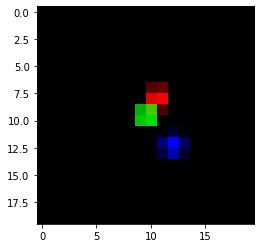

In [4]:
img = env.reset()
plt.imshow(img)

In [5]:
from IPython.display import clear_output, display
import ipywidgets as widgets
from time import sleep
from PIL import Image
import io

In [6]:
def visualize_env(env):

    def npimg_to_png(obs):
    #     print(obs.shape)
    #     obs_rgb = (obs/0.2 * 200).astype(np.uint8).reshape(*obs.shape, 1).repeat(3, axis=2)
    #     obs_rgb = obs
        obs_rgb = np.array(obs * 255, dtype=np.uint8)
    #     print(obs_rgb.shape)
        img = Image.fromarray(obs_rgb)
    #     img = img.resize((obs.shape[1] * 10, obs.shape[0] * 10), Image.NEAREST)

        img_byte_arr = io.BytesIO()
        img.convert('RGB').save(img_byte_arr, format='PNG')
        img_byte_arr = img_byte_arr.getvalue()
        return img_byte_arr

    obs = env.reset()

    img_widget = widgets.Image(
        value=npimg_to_png(obs),
        format='png',
        width=200,
        height=200,
    )

    def show_obs(obs, permute=None):
    #     obs = unpermute_observation(obs)
    #     if permute is None:
    #         permute = ck.value
    #     if permute:
    #         obs = permute_observation(obs, perm)
        img_widget.value = npimg_to_png(obs)

    show_obs(obs)
    done = False

    filled = False
    step = 0

    display(img_widget)
    # display(info)

    while True:
        obs = env.reset()
        show_obs(obs)
        done = False
        while not done:
            obs, rew, done, info = env.step(env.action_space.sample())
            show_obs(obs)
            sleep(0.05)

In [7]:
env = RocketEpicycleEnvironment(epicycles=True)#False)#True)#False)
visualize_env(env)

Image(value=b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x00\x14\x00\x00\x00\x14\x08\x02\x00\x00\x00\x02\xeb\…

KeyboardInterrupt: 

In [8]:
env = RocketEpicycleEnvironment(epicycles=False)
visualize_env(env)

Image(value=b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x00\x14\x00\x00\x00\x14\x08\x02\x00\x00\x00\x02\xeb\…

KeyboardInterrupt: 

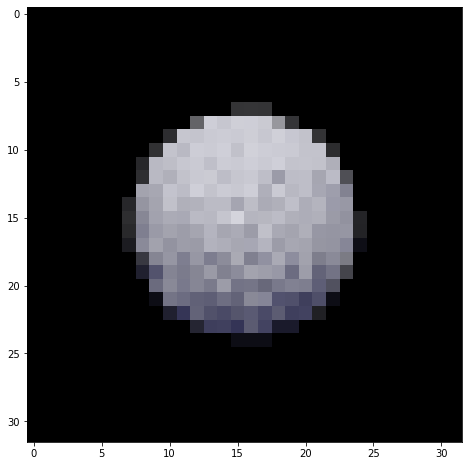

In [2]:
import os
# switch to "osmesa" or "egl" before loading pyrender
os.environ["PYOPENGL_PLATFORM"] = "egl"
os.environ['DISPLAY'] = ':10'

import numpy as np
import pyrender
import trimesh
import matplotlib.pyplot as plt

In [3]:
# generate mesh
sphere = trimesh.creation.icosphere(subdivisions=4, radius=0.8)
sphere.vertices+=1e-2*np.random.randn(*sphere.vertices.shape)
mesh = pyrender.Mesh.from_trimesh(sphere, smooth=False)

# compose scene
scene = pyrender.Scene(ambient_light=[.1, .1, .3], bg_color=[0, 0, 0])
camera = pyrender.PerspectiveCamera( yfov=np.pi / 3.0)
light = pyrender.DirectionalLight(color=[1,1,1], intensity=2e3)

scene.add(mesh, pose=  np.eye(4))
scene.add(light, pose=  np.eye(4))

c = 2**-0.5
scene.add(camera, pose=[[ 1,  0,  0,  0],
                        [ 0,  c, -c, -2],
                        [ 0,  c,  c,  2],
                        [ 0,  0,  0,  1]])

# render scene
r = pyrender.OffscreenRenderer(32, 32)
color, _ = r.render(scene)

plt.figure(figsize=(8,8)), plt.imshow(color);


GLError: GLError(
	err = 12289,
	baseOperation = eglMakeCurrent,
	cArguments = (
		<OpenGL._opaque.EGLDisplay_pointer object at 0x7ff9479cf0e0>,
		<OpenGL._opaque.EGLSurface_pointer object at 0x7ff9519623b0>,
		<OpenGL._opaque.EGLSurface_pointer object at 0x7ff9519623b0>,
		<OpenGL._opaque.EGLContext_pointer object at 0x7ff9479cf3b0>,
	),
	result = 0
)